## Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
path = r'C:\Users\justi\OneDrive\Documents\Career foundry\Data Immersion 6'

In [25]:
df_team_recruit = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'team_recruit.csv'))

In [26]:
df_team_recruit.head()

,Column1,primary_key,freshman_year,name,position,high_school,rating,stars,committed_to,recruit_type,...,ncaa_year,ncaa_team,conference,total_games,win,loss,off_rank,def_rank,star_ranking,star_position
0,0,"2018, Air Force",2018,Jace Bobo,OLB,Cy-Fair,0.7953,2,Air Force,HighSchool,...,2018,Air Force,MWC,12,5,7,52,43,2_star,2_star_OLB
1,1,"2018, Air Force",2018,Malik Rodgers,WR,Shadow Creek,0.8065,3,Air Force,HighSchool,...,2018,Air Force,MWC,12,5,7,52,43,3_star,3_star_WR
2,2,"2018, Air Force",2018,Jaylen Jones,S,Alief Hastings,0.8054,3,Air Force,HighSchool,...,2018,Air Force,MWC,12,5,7,52,43,3_star,3_star_S
3,3,"2018, Air Force",2018,Warren Bryan,DUAL,Damien,0.7792,2,Air Force,HighSchool,...,2018,Air Force,MWC,12,5,7,52,43,2_star,2_star_DUAL
4,4,"2018, Air Force",2018,Chris Kane,TE,San Clemente,0.8255,3,Air Force,HighSchool,...,2018,Air Force,MWC,12,5,7,52,43,3_star,3_star_TE


In [30]:
df_t_r = df_team_recruit[['freshman_year', 'rating', 'stars', 'height', 'weight', 'ncaa_year', 'total_games', 'win', 'loss', 'off_rank', 'def_rank',]]

## Create clusters and elbow curve

In [31]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [32]:
score = [kmeans[i].fit(df_t_r).score(df_t_r) for i in range(len(kmeans))]

C:\Users\justi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\justi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\justi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\justi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\justi\anaconda3\lib\site-packages\sklearn\clust

In [33]:
score

[-63650102.50138426,
 -43565687.92273159,
 -33440756.623729527,
 -26801058.019416057,
 -23173716.859458726,
 -19740822.302138463,
 -17356476.828130964,
 -16025522.27116805,
 -14903689.87994178]

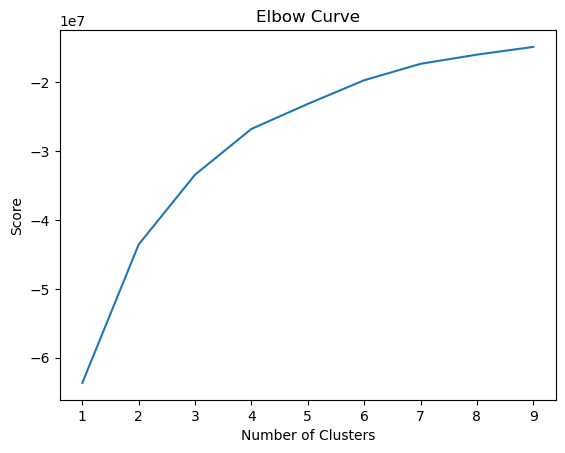

In [34]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [52]:
# I decided to use 4 clusters as that is the closest to the curve leveling out without using too many clusters.

In [35]:
kmeans = KMeans(n_clusters = 4) 

## Create clusters column

In [36]:
kmeans.fit(df_t_r)

C:\Users\justi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [37]:
df_t_r['clusters'] = kmeans.fit_predict(df_t_r)

C:\Users\justi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\justi\AppData\Local\Temp\ipykernel_17596\1071306222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t_r['clusters'] = kmeans.fit_predict(df_t_r)


In [38]:
df_t_r.head()

,freshman_year,rating,stars,height,weight,ncaa_year,total_games,win,loss,off_rank,def_rank,clusters
0,2018,0.7953,2,73.0,210.0,2018,12,5,7,52,43,0
1,2018,0.8065,3,69.0,165.0,2018,12,5,7,52,43,0
2,2018,0.8054,3,73.0,205.0,2018,12,5,7,52,43,0
3,2018,0.7792,2,74.0,190.0,2018,12,5,7,52,43,0
4,2018,0.8255,3,77.0,213.0,2018,12,5,7,52,43,0


In [39]:
df_t_r['clusters'].value_counts()

0    3758
2    3267
3    3081
1    2897
Name: clusters, dtype: int64

# Plot clusters

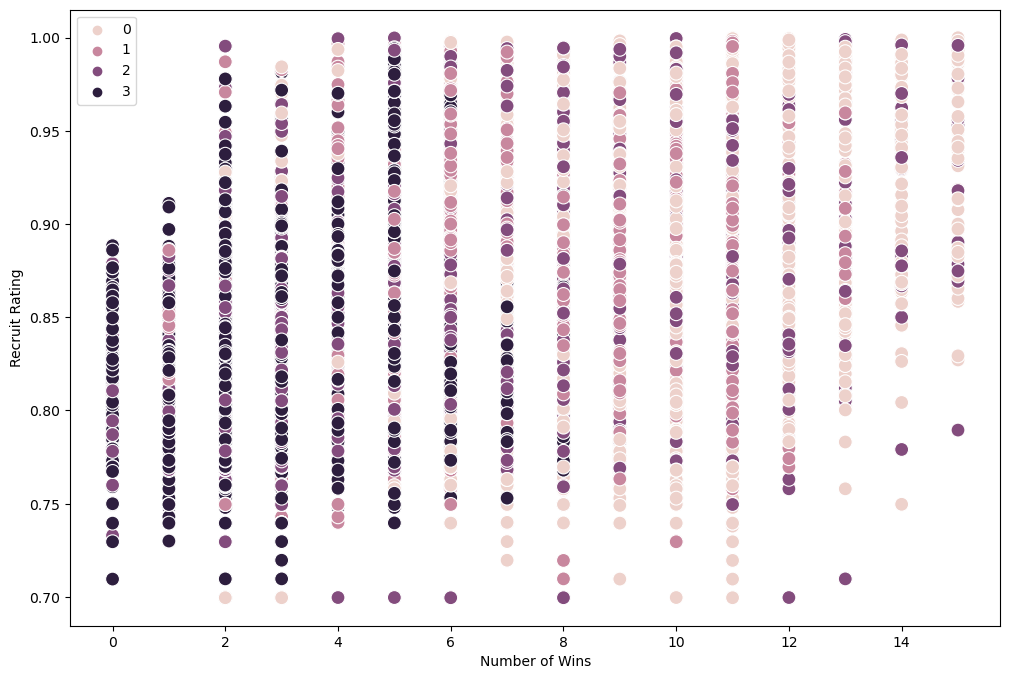

In [41]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_t_r['win'], y=df_t_r['rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Wins') # Label x-axis.
plt.ylabel('Recruit Rating') # Label y-axis.
plt.show()

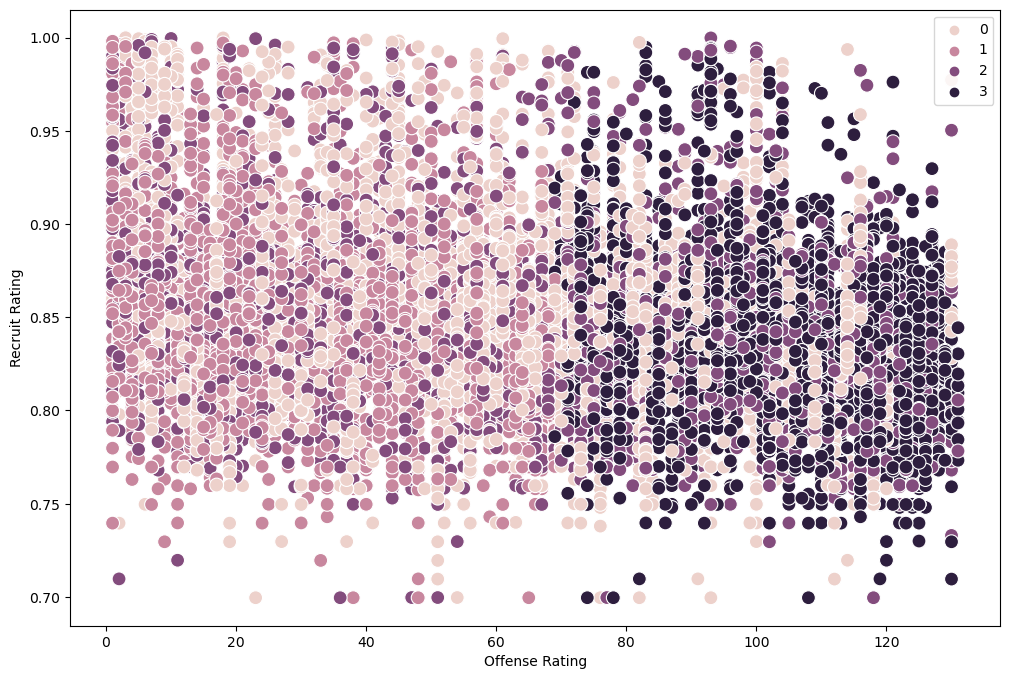

In [54]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_t_r['off_rank'], y=df_t_r['rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Offense Rating') # Label x-axis.
plt.ylabel('Recruit Rating') # Label y-axis.
plt.show()

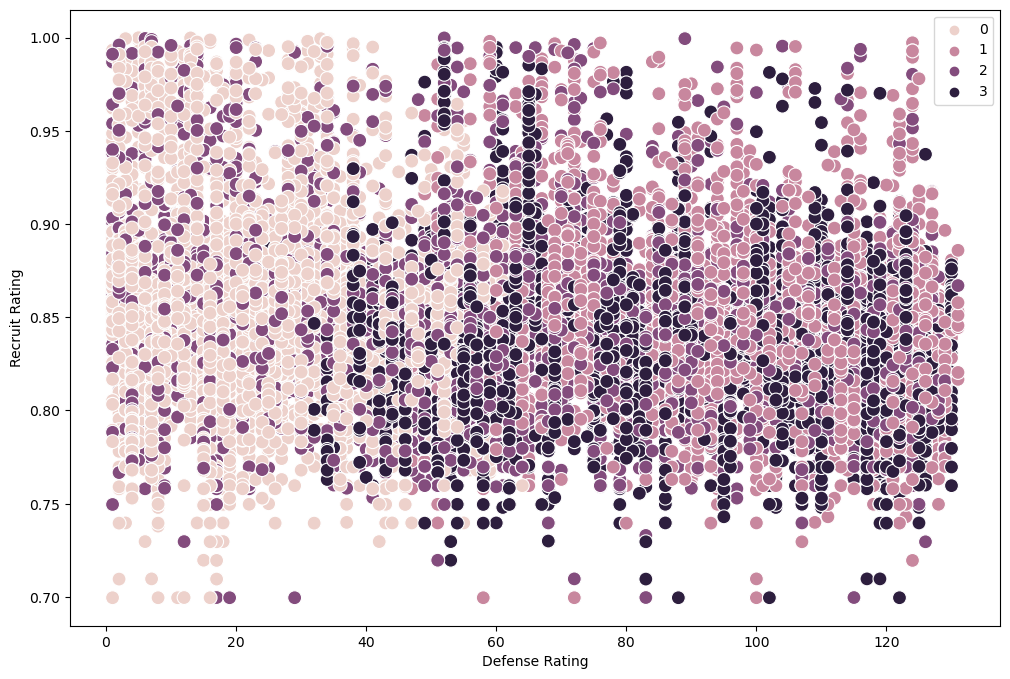

In [43]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_t_r['def_rank'], y=df_t_r['rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Defense Rating') # Label x-axis.
plt.ylabel('Recruit Rating') # Label y-axis.
plt.show()

## Clusters descriptive statistics

In [50]:
df_t_r.loc[df_t_r['clusters'] == 3, 'cluster'] = 'black'
df_t_r.loc[df_t_r['clusters'] == 2, 'cluster'] = 'dark purple'
df_t_r.loc[df_t_r['clusters'] == 1, 'cluster'] = 'pink'
df_t_r.loc[df_t_r['clusters'] == 0, 'cluster'] = 'beige'

In [51]:
df_t_r.groupby('cluster').agg({'rating':['mean', 'median'], 
                         'win':['mean', 'median'], 
                         'off_rank':['mean', 'median'],
                          'def_rank':['mean', 'median']})

rating               win           off_rank          def_rank  \
                 mean  median      mean median        mean median       mean   
cluster                                                                        
beige        0.854287  0.8511  8.514635    9.0   58.275146   57.0  24.459819   
black        0.834538  0.8340  3.609867    3.0  103.813697  106.0  83.190523   
dark purple  0.847387  0.8444  6.452403    7.0   62.669728   62.0  62.357208   
pink         0.848129  0.8452  6.319641    6.0   32.590266   31.0  94.427684   

                    
            median  
cluster             
beige         23.0  
black         81.0  
dark purple   61.0  
pink          94.0